In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
from openpyxl import load_workbook
import pandas as pd
import os

#This is your excel file location
excel_file_location = "C:\\Users\\Ethan\\OneDrive - Westminster College\\Lignin_Biofilm_Project\\python_image_analysis.xlsx"

root = tk.Tk()
root.withdraw()  # Hide the root window
#Prompt user to select image file
file = filedialog.askopenfilename(title='Select an image file')
if not file:
    print("No file selected. Exiting.")
    exit()
img = cv2.imread(f'{file}', cv2.IMREAD_UNCHANGED)
#print(f'dtype: {img.dtype}, shape: {img.shape}, min: {np.min(img)}, max: {np.max(img)}')

dtype: uint8, shape: (1944, 2592, 4), min: 0, max: 255


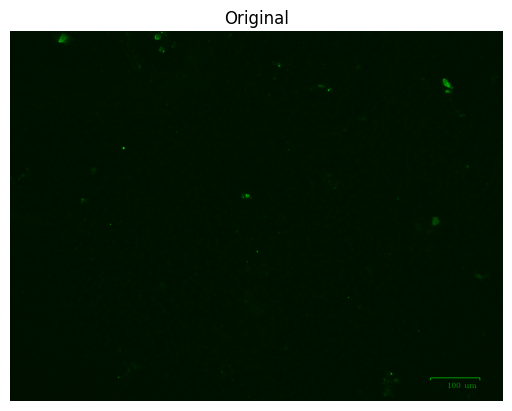

In [102]:
def show_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    #cv2.imwrite(f'{file}_{title}.png', img)
show_image(img, 'Original')


In [103]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#show_image(gray_image, 'Gray_image')

In [104]:
#Filtering
low_cutoff = 5
hight_cutoff = 84

gray_image_filtered = np.copy(gray_image)
gray_image_filtered[gray_image < low_cutoff] = np.median(gray_image)
gray_image_filtered[gray_image > hight_cutoff] = np.median(gray_image)
#show_image(gray_image_filtered, 'Gray_image_filtered')

In [105]:
##Guassian thresholding method
thresh_guass = cv2.adaptiveThreshold(
    gray_image_filtered, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    725, 0
)
#show_image(thresh_mean, 'Adaptive Guassian Thresholding')
#show_image(thresh_guass, 'Adaptive_Guassian_Thresholding')

In [106]:
##Blur
def blur_image(img, kernel_size=(5,5), sigma=0):
    blur = cv2.GaussianBlur(img, (5,5), 0)
    # plt.subplot(121),plt.imshow(img),plt.title('Original')
    # plt.xticks([]), plt.yticks([])
    # plt.subplot(122),plt.imshow(blur),plt.title('Blur')
    # plt.xticks([]), plt.yticks([])
    return blur
blur = blur_image(thresh_guass, (5,5), 0)



In [107]:
##applying erosion and dilation
# kernel = np.ones((2, 1), np.uint8)

# def process(img, iterations = 1):
#     img_processed = cv2.dilate(img, kernel, iterations=iterations)
#     img_processed = cv2.erode(img, kernel, iterations=iterations)
#     return img_processed
# img_processed = process(thresh_guass, 1)

# show_image(img_processed, 'Processed_image')

In [108]:
##Applies the Otsu's thresholding method
#  ret, otsu_thresh = cv2.threshold(
#     gray_image_filtered, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# print("Calculated Otsu threshold value:", ret)
# show_image(otsu_thresh, "Otsu’s Thresholding")

In [109]:
#Figure out %Area of white pixels
def white_area_percentage(img):
    white_pixels = np.sum(img >= 125)
    total_pixels = img.size
    percentage = (white_pixels / total_pixels) * 100
    return percentage
percentage = white_area_percentage(blur)
print("This is the percent area covered:", percentage)

This is the percent area covered: 30.14710902174465


In [110]:
#Median intensity of pixels
def median_intensity(img):
    median_val = np.median(img)
    return median_val
median_val = median_intensity(gray_image_filtered)
print("This is the median intensity of pixels:", median_val)

This is the median intensity of pixels: 10.0


In [111]:
#Mean intensity of pixels
def mean_intensity(img):
    mean_val = np.mean(img)
    return mean_val
mean_val = mean_intensity(gray_image_filtered)
print("This is the mean intensity of pixels:", mean_val)

This is the mean intensity of pixels: 10.27283001987756


In [120]:
#Append results to excel sheet
def append_results(path, row_dict, sheet_name="Sheet1"):
    """
    Append a dictionary of results as a new row to an Excel file.
    Creates the file if it doesn't exist.
    """
    new_df = pd.DataFrame([new_row])

    try:
        # Load existing workbook
        book = load_workbook(path)

        # Find the last row in the existing sheet
        startrow = book[sheet_name].max_row

        # Append new row without header
        with pd.ExcelWriter(path, engine="openpyxl", mode="a", if_sheet_exists="overlay") as writer:
            new_df.to_excel(writer, sheet_name=sheet_name,
                            startrow=startrow, index=False, header=False)
        file_name = os.path.basename(file)
        print(f"Appended {file_name} to {path}")

    except PermissionError:
        print(f"PermissionError: {path} is locked (Excel or OneDrive may have it open). Close it and try again.")


In [121]:
#Check you have an excel file location then adds the data
if excel_file_location is not None:
    new_row = {'Image_Name': os.path.basename(file), 
               'White_Area_Percentage': percentage, 
               'Median_Intensity': median_val, 
               'Mean_Intensity': mean_val
    }
    append_results(excel_file_location, new_row, sheet_name='Sheet1')

Appended C1T1.tif to C:\Users\Ethan\OneDrive - Westminster College\Lignin_Biofilm_Project\python_image_analysis.xlsx
